In [2]:
import pandas as pd
import numpy as np

Mean                4.000000
StdDev              0.569544
channel_2           4.000000
Revenue_ch_2     9320.866005
Revenue_ch_1    10035.000000
Diff                0.000000
Name: 83, dtype: float64
Mean                2.000000
StdDev              1.347677
channel_2           2.000000
Revenue_ch_2    10010.866005
Revenue_ch_1    10725.000000
Diff                0.000000
Name: 101, dtype: float64
     Mean    StdDev  channel_2  Revenue_ch_2  Revenue_ch_1  Diff
180     2  2.841432          2  12320.866005         13035     0


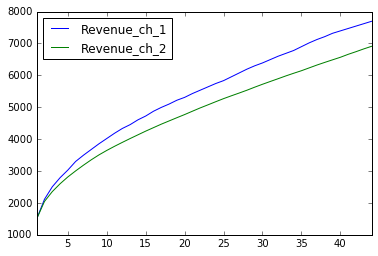

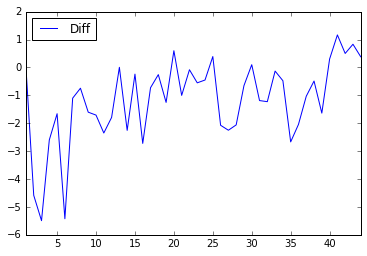

In [4]:
train = pd.read_table('data.txt', sep='\t')
columns =  train.Reg.unique()
index = train.Bill.unique()
# creating columns dictionary for further use
colDict = dict()
for i in range(len(columns)):
    colDict[columns[i]] = i
    
test = pd.DataFrame(index=index, columns = columns)
#test = test.fillna(0) # with 0s rather than NaN's

test_np  = test.values
train_np = train.values

for i in columns:
    for j in train_np:
        if j[0] != i: continue
        test_np[colDict[j[1]]][colDict[i]] = j[2]

# changing structure to get percentage data
# transposing for easier work with it
test_np = test_np.transpose()
for i in range(len(test_np)):
    #start point for slicing
    start = 0
    for j in range(len(test_np[i])):
        if np.isnan(test_np[i][j]): continue;
        start = j;
        break;
    test_np[i] = np.append(test_np[i][start:], test_np[i][:start])
# returning to default view
test_np = test_np.transpose()

# converting numpy to pandas -> total data
index = [x + 1 for x in range(len(index))]
test_raw = pd.DataFrame(test_np, columns=columns, index = index)

# converting numpy to pandas -> percentage data
test_np = np.copy(test_np.transpose())
for i in range(len(test_np)):
    division = test_np[i][0]
    for j in range(len(test_np[i])):
        if np.isnan(test_np[i][j]):break;
        test_np[i][j] =  np.round(test_np[i][j] / division * 100, decimals = 2)
        
test_np1 = test_np.transpose()
test_perc = pd.DataFrame(test_np1, columns=columns, index = index)

# appending tables
# making over addintional analysis about difference in % rate
test_perc['Mean'] = test_perc.mean(axis=1)
test_perc['StdDev'] = test_perc.std(axis=1)
# opening file with data from channel 2
data = []
with open('channel_1.txt') as f:    
    f = f.read().split('\n')[1:]
    for row in f:    
        data.append(row)
test_perc['channel_2'] = data[:len(index)]
revenue = test_perc[['Mean', 'StdDev', 'channel_2']].astype(float)
revenue_columns = ['Mean', 'StdDev', 'channel_2', 'Revenue_ch_2', 'Revenue_ch_1']

# Getting our expected Revenue Values
predict = np.copy(revenue.values)
predict.resize((len(predict), len(predict[0]) + 2))
length = len(predict)
for i in range(length):
    if not i == 0: 
        predict[i][-2] = predict[i - 1][3] + 15 * predict[i][0]
        predict[i][-1] = predict[i - 1][4] + 15 * predict[i][2]
    else:
        predict[i][-2] = 1500
        predict[i][-1] = 1500


# Looking up differences in Revenues 
prediction = pd.DataFrame(predict, columns=revenue_columns, index = index)
prediction['Diff'] = prediction['Mean'] - prediction['channel_2']
rp = prediction[['Revenue_ch_1', 'Revenue_ch_2']]
dp = prediction[['Diff']]
%matplotlib inline
rp.plot()
dp.plot()

# Data with all rates for channel_1
data = []
with open('channel_1_after_35.txt') as f:    
    f = f.read().split('\n')
    for row in f:    
        data.append(row)

#Calculating our second variant
predict = np.copy(prediction.values)
predict = np.resize(predict, (180, len(predict[0])))
for i in range(34, 180):
    # adding new values to percentages
    predict[i][0] = float(data[i])
    predict[i][2] = float(data[i])
    # calculating summ
    predict[i][-3] = predict[i - 1][3] + 15 * predict[i][0]
    predict[i][-2] = predict[i - 1][4] + 15 * predict[i][2]
    predict[i][-1] = 0
revenue_columns.append('Diff')
predict = pd.DataFrame(predict, columns=revenue_columns, index = range(1, 181))
print predict[predict['Revenue_ch_1']>10000].iloc[0]
print predict[predict['Revenue_ch_2']>10000].iloc[0]
print predict.tail(1)